<h3> NBA 5 year careeer prediction using XBoost Classifier

In [1]:
import pandas as pd
import numpy as np

<h4> 1. Load processed sets

<h5> Loading scaled training, validation and test sets from data_prep step saved on the data/processed folder saving them into X_train, X_val, y_train, y_val, X_test, X_test_ID variables

In [2]:
#Load Test and validation sets using custom function load_sets
from src.data.sets import load_sets

In [3]:
X_train, X_val, y_train, y_val, X_test, X_test_ID = load_sets()

<h5> Reviewing weight of the minority vs mayority class to be used from the imported sets that had been re-sampled. As we can see, the training sets are 50% balanced

In [4]:
# calculating weights for unbalanced data validation
sum_wpos = len([item for item in y_train if item==1 ])
sum_wneg = len([item for item in y_train if item==0 ])
sum_wneg/sum_wpos

1.0

<h4> 2. Import Random Forest

<h5> Importing and fitting Random Forest Classifier

In [5]:
import xgboost as xgb

In [6]:
ml_model = xgb.XGBClassifier(
                                max_depth = 4,
                                learning_rate = 0.1,
                                min_child_weight = 2,
                                subsample = 0.5,
                                colsample_bytree = 0.5,
                                reg_alpha = 0,
                                reg_lambda = 1,
                                scale_pos_weight= sum_wneg/sum_wpos
                            )

In [7]:
from sklearn.linear_model import LogisticRegression

<h4> 2.2 Importing predictors names saved

<h5> As column importance is given in order of appearance on the scaled set, importing column names saved in data_prep for easy visualization and identification will be performed

<h5> Importing predictor column names and combining with relevant columns to find out the best feature predictors

In [8]:
#predictors  = pd.read_csv('../data/interim/predictor_names.csv')

In [9]:
#predictors_df = predictors.copy()

In [10]:
#predictors = predictors['names'].tolist()

<h4> 3. Train RF Classifier with new calculated training sets

<h5> Next up, the RF classifier will be imported and trained with the new training set and saved into the models folder

In [11]:
ml_model.fit(X_train, y_train , early_stopping_rounds=10, 
              eval_metric='auc', eval_set=[(X_val,y_val)])

[0]	validation_0-auc:0.67313
[1]	validation_0-auc:0.66058
[2]	validation_0-auc:0.69473


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.69229
[4]	validation_0-auc:0.69014
[5]	validation_0-auc:0.69283
[6]	validation_0-auc:0.69080
[7]	validation_0-auc:0.69104
[8]	validation_0-auc:0.69004
[9]	validation_0-auc:0.68933
[10]	validation_0-auc:0.69470
[11]	validation_0-auc:0.69463
[12]	validation_0-auc:0.69683
[13]	validation_0-auc:0.69286
[14]	validation_0-auc:0.69009
[15]	validation_0-auc:0.69468
[16]	validation_0-auc:0.70103
[17]	validation_0-auc:0.70102
[18]	validation_0-auc:0.70054
[19]	validation_0-auc:0.69994
[20]	validation_0-auc:0.70255
[21]	validation_0-auc:0.69860
[22]	validation_0-auc:0.69901
[23]	validation_0-auc:0.69787
[24]	validation_0-auc:0.69703
[25]	validation_0-auc:0.69775
[26]	validation_0-auc:0.69627
[27]	validation_0-auc:0.69683
[28]	validation_0-auc:0.69786
[29]	validation_0-auc:0.69613
[30]	validation_0-auc:0.69494


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

<h5> After the model has been fitted, it will be saved in the models folder in case it needs to be re-called on a later process

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
#Save model in the models folder
#from joblib import dump
#dump(rf_model, '../models/RF5.joblib')

<h4> 3.1 Generate predictions for training and validation sets in order to compare accuracy and AUROC

<h5> The fitted model will be used to predict the validation and test set

In [14]:
y_val_preds = ml_model.predict(X_val)

In [15]:
y_trainpreds = ml_model.predict(X_train)

<h4> 3.2 Calculate model score in training and validation sets to assess fitting accuracy

In [16]:
ml_model.score(X_train, y_train)

0.8020659780073309

In [17]:
ml_model.score(X_val, y_val)

0.7425

<h5> The training model shows a perfect fit with the training set, however, the model score drops to 0.82 on the validation set suggesting there is overfitting in the training set

<h4> 4 Analysis of the validation set

<h5> 4.1 Confusion Matrix

<h5> Analysis of the results will be done through a confusion matrix and AUROC to gather insights as to where the accuracy/innacuracy exists in order to improve the model in future experiments <br> <br> We'll look into a confusion matrix to see the distribution of the predictions from the model

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

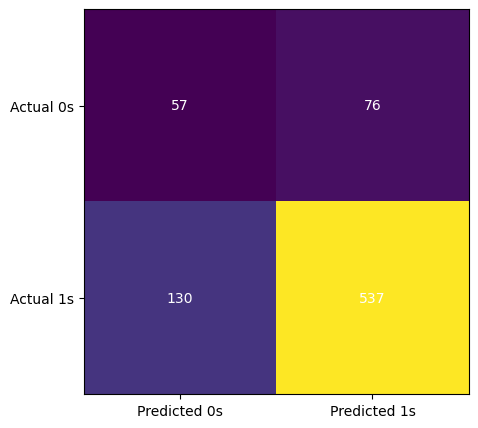

In [25]:
cm = confusion_matrix(y_val, y_val_preds , normalize='true'
                     )

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

<h5> As seen in the confusion matrix, 92% of true positive target was predicted correctly, however, 97% of negative target was predicted incorrectly (false positive)

<h5> 4.2 AUROC

In [20]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [21]:
y_val_prob = ml_model.predict_proba(X_val)

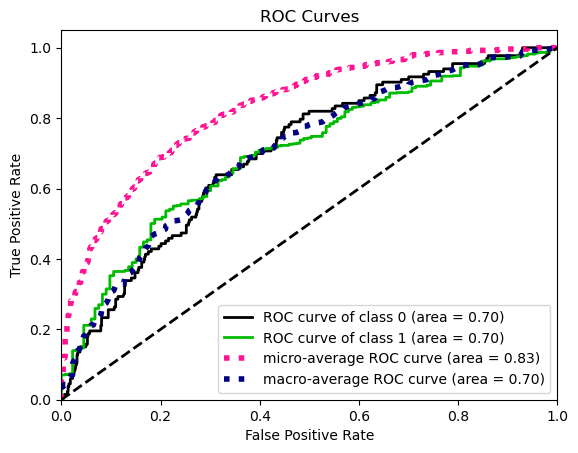

In [22]:
skplt.metrics.plot_roc(y_val, y_val_prob)
plt.show()

<h5> When analysing AUROC on the validation set, the mean ROC AUC is 0.67, meaning the model is predicting only 69% of the instances correctly

<h5> 4.3 Analysis of false positives vs positives to identify patterns

<h5> Analysing true positives vs false positives as this is where the model is not accurately predicting the target

In [23]:
#X_val_df = pd. DataFrame(X_val, columns = predictors)

In [24]:
y_val_list = y_val.tolist()
X_val_df['y_val']=y_val_list

NameError: name 'X_val_df' is not defined

In [ ]:
X_val_df['y_val_preds']=y_val_preds

In [ ]:
#True Negatives
X_val_true_neg = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==0)]
X_val_true_neg.describe()

In [ ]:
X_val_true_neg.shape

In [ ]:
#False Positive
X_val_false_pos = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==1)]
X_val_false_pos.describe()

In [ ]:
X_val_false_pos.shape

In [ ]:
# True Positives
X_val_true_pos = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==1)]
X_val_true_pos.describe()

In [ ]:
X_val_true_pos.shape

In [ ]:
# False Negative
X_val_false_neg = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==0)]
X_val_false_neg.describe()

In [ ]:
X_val_false_neg.shape

<h5> True positives have very similar statistics than false positives making it difficult for the model to correclty classify the observations from that boundary <br> <br>
    additional sampling experimentation needs to be done for the observations in this boundary
    

<h4> 5 Generate predictions on the test set for Kaggle submission

<h5> The final step is to generate the prediction probabilities from the test set in order to evaluate the score from Kaggle via csv upload

In [ ]:
y_test_preds = ml_model.predict_proba(X_test)

In [ ]:
#Create Data Frame for Doc printing
df =pd.DataFrame()

In [ ]:
y_test_preds

In [ ]:
target_prob = y_test_preds
target_prob = [item[1] for item in y_test_preds]

In [ ]:
df['Id'] = X_test_ID
df['TARGET_5Yrs'] = target_prob

In [ ]:
df.head()

In [ ]:
#Saving predictions into csv
df.to_csv('../data/external/Kaggle_submission_XGB_smote_team_trial.csv', index=False)

<h5> Kaggle submission score is 0.68 which is in line with the AUROC metric